# GDELT Demo: Classification

Instructions: [README.md](../README.md) in project root.

Starting point for Jupyter notebooks: [/Start_here.ipynb](../Start_here.ipynb) in project root.


This notebook breaks out some of the classification tasks associated with my GDELT analysis. For this initial stage I will address questions like: 

* Can I use various aggregate stats of "relationships" (as actor 1, actor 2, or both) to identify developed versus developing (or high- vs. low-GDP, or high- vs. low-HDI) countries?

## Findings and visualizations

**NOTE**: As with the regression analysis, to allow for execution of these demos without placing multiple gigabytes in the repo, I am engineering them to run with sample data when bigger datasets are unavailable. Thus specific metrics may not agree with what I report.

In [1]:
import sys
import os
import importlib

#project imports
sys.path.insert(0, os.path.join(os.getcwd(), ".."))
import classification
import pandas_gdelt_helper


*****    DECISION TREE    *****
Gini score is 0.859375



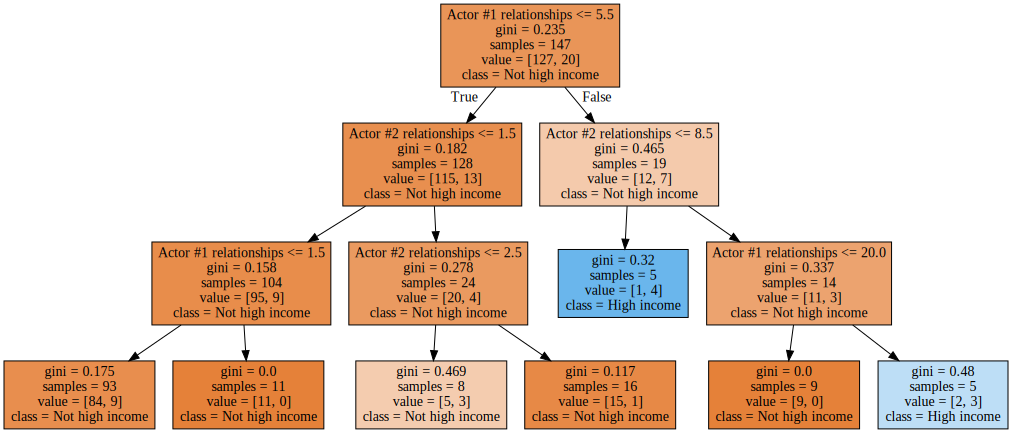

Entropy score (i.e. information gain) is 0.859375



In [4]:
importlib.reload(classification)
importlib.reload(pandas_gdelt_helper)

from classification import GdeltDecisionTreeTask as DTTask
task = DTTask()
task.go()
# task.do_svm()
# task.do_random_forest()

#### Interpretation
This is mostly a proof of concept because running a 3-level decision tree with two features is pretty trivial. This is really just a proof-of-concept that I will build out with more features.

Nevertheless, it conforms a bit to my prior intuition:
* Less rich countries tend to be ''actors'' less often. There could be various reasons: the database may be biased toward actions by richer countries, or there may be a correlation between overall size (e.g. population) and wealth among these countries. 
* But among those who do have a lot of Actor \#1 relationships in the database, the wealthy ones tend to have fewer Actor \#2 relationships. They act upon others rather than being acted upon. Again, this could be bias in the dataset designations of actors 1 and 2, or could really be an underlying phenomenon.
* But then, among those countries with a large number of actor \#2 relationships (> 8.5) there are a few with an immense number of actor \#1 relationships (> 20). And those tend to be richer countries.

It will be fun to watch this develop as I add a more reasonable number of features. Meanwhile here are some thoughts on how to build it out: 

* Instead of actor 1 and actor 2 relationships, what about total # and the proportion that are actor 1 vs. 2.
* Add more features: Perhaps by type of event (violent vs nonviolent or aggressive etc.)
* And then on to the bigger goal -- time series related features.


But first, I want to try other classification methods.

**THIS NEEDS TO BE UPDATED A BIT**

### Classification by level of development

For this initial version, just divide the world into developed and developing countries based on GDP.
This classification isn't inherently earthshaking (because we can simply look up GDP and don't need GDELT to predict it) but it's a sort of sanity check that my classification strategies are interesting. More generally, predicting development by the 'signature' in GDELT might tell us something nontrivial about world events.

Features will be things like "number of different relationships," "ratio of actor 1 to actor 2 relationships," specific CAMEO codes (eventcode families) in those relationships, etc., where *relationships* means events linking actor 1 to actor 2.

In [5]:
importlib.reload(classification)
importlib.reload(pandas_gdelt_helper)
from pandas_gdelt_helper import get_country_features
get_country_features()


,name,actor1_relationships,actor2_relationships,Country Name,Indicator Name,Indicator Code,2017,Unnamed: 62,is_high_income
BOL,Bolivia,1,4,Bolivia,GDP per capita (current US$),NY.GDP.PCAP.CD,3393.955818,NaN,False
CAN,Canada,12,7,Canada,GDP per capita (current US$),NY.GDP.PCAP.CD,45032.119908,NaN,True
ESP,Spain,5,6,Spain,GDP per capita (current US$),NY.GDP.PCAP.CD,28156.815836,NaN,False
FRA,France,13,15,France,GDP per capita (current US$),NY.GDP.PCAP.CD,38476.658636,NaN,True
GBR,United Kingdom,24,18,United Kingdom,GDP per capita (current US$),NY.GDP.PCAP.CD,39720.443427,NaN,True
GHA,Ghana,14,12,Ghana,GDP per capita (current US$),NY.GDP.PCAP.CD,1641.486625,NaN,False
ISR,Israel,28,31,Israel,GDP per capita (current US$),NY.GDP.PCAP.CD,40270.251346,NaN,True
ITA,Italy,17,18,Italy,GDP per capita (current US$),NY.GDP.PCAP.CD,31952.975921,NaN,True
LBY,Libya,14,10,Libya,GDP per capita (current US$),NY.GDP.PCAP.CD,7998.028819,NaN,False
POL,Poland,42,40,Poland,GDP per capita (current US$),NY.GDP.PCAP.CD,13811.664244,NaN,False


### Using classifiers to predict violent events

The sanity check version of this would be whether simply a certain number of violent event codes at time *t-1* back to whatever *t-N* predicts violent events. Violent events will need to be defined based on CAMEO code.

More interestingly, the question would be predicting violence at time *t* through nonviolent patterns at time *t'* < *t*.